In [1]:
from numpy import *
import operator

def classify0(inX,dataSet,labels,k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX,(dataSetSize,1)) - dataSet
    sqDiffMat = diffMat ** 2
    #decrease the influence of depth
    sqDiffMat[:,0] = sqDiffMat[:,0]/2
    #decrease the influence of depth
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteLabel = labels[sortedDistIndicies[i]]
        classCount[voteLabel] = classCount.get(voteLabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key = lambda d:d[1],reverse = True)
    return sortedClassCount[0][0]

def gerAccuracy(testset, predictions):
    mse_sum = 0
    for i in range(len(testset)):
        mse_sum += (testset[i]-predictions[i])**2
    mse = mse_sum/len(testset)
    return mse

In [2]:
import pandas as pd 
import numpy as np
from numpy import *
df = pd.read_csv('D:/datafest/g_train.csv')
test = pd.read_csv('D:/datafest/g_test.csv')

In [3]:
train_df = df[['FOCAL_DEPTH','EQ_PRIMARY']]
dataset = array(train_df)
labels = list(df['INTENSITY'])

In [4]:
test_sample = array(test[['FOCAL_DEPTH','EQ_PRIMARY']])
test_truth = list(test['INTENSITY'])
x = list()
for i in test_sample:
    x.append(classify0(i, dataset, labels, 16))

3.0843373494


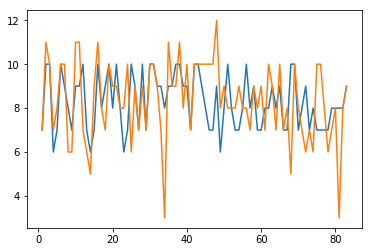

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

mse = gerAccuracy(test_truth, x)
print(mse)
y = range(1, len(x)+1)
plt.figure
plt.plot(y, x)
plt.plot(y, test_truth)

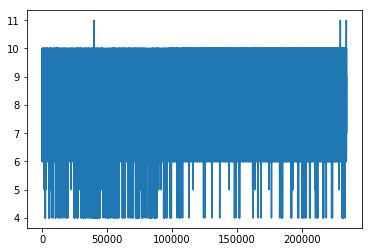

In [6]:
#get the mmi of worldwild
%matplotlib inline
import matplotlib.pyplot as plt

ww = pd.read_csv('D:/datafest/worldwild_mmi.csv')
worldwild = array(ww[['depth','mag']])
mmi = list()
for i in worldwild:
    mmi.append(classify0(i, dataset, labels, 16))

y = range(1, len(mmi)+1)
plt.figure
plt.plot(y, mmi)

In [162]:
mmi_df = pd.DataFrame(mmi)
mmi_df.to_csv('D:/datafest/worldwild_mmi_result.csv')

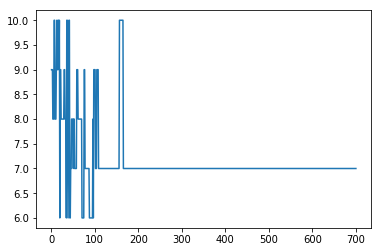

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

tm = pd.read_csv('D:/datafest/tokyo_mag.csv')
tm_m = array(tm[['depth','mag']])

mmi_tokyo = list()
for i in tm_m:
    mmi_tokyo.append(classify0(i, dataset, labels, 16))

y_t = range(1, len(mmi_tokyo)+1)
plt.figure
plt.plot(y_t, mmi_tokyo)

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio  

In [15]:
tm['mmi'] = array(mmi_tokyo)

,Unnamed: 0,time,depth,mag,mmi
0,0,11/6/2017,0,6.486719,9
1,1,11/7/2017,1,6.490214,9
2,2,11/8/2017,2,6.493708,9
3,3,11/9/2017,3,6.497203,8
4,4,11/10/2017,4,6.500698,8
5,5,11/11/2017,5,6.504192,8
6,6,11/12/2017,6,6.507687,10
7,7,11/13/2017,7,6.511182,10
8,8,11/14/2017,8,6.514676,8
9,9,11/15/2017,9,6.518171,8


In [34]:
tm.to_csv('D:/datafest/tokyo_mag_final.csv')

In [35]:
tt = pd.read_csv('D:/datafest/scale_mag.csv')

ValueError: Argument Z must be 2-dimensional.

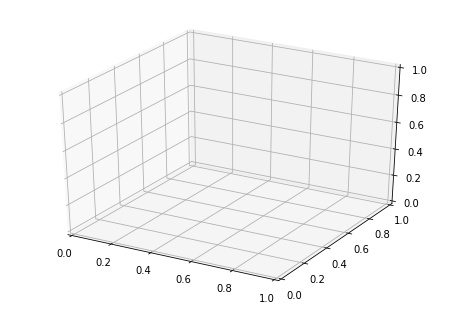

In [31]:
fig = plt.figure()
ax = Axes3D(fig)
X = tt['depth']
#X = np.arange(-4, 4, 0.25)
Y = tm['mag']
X, Y = np.meshgrid(X, Y)
R = tm['mag']
#R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
#Z = tm['mmi']
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

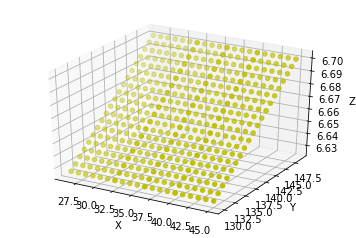

In [40]:
x,y,z = tt['lat'],tt['long'],tt['mag']
ax=plt.subplot(111,projection='3d')

ax.scatter(x[:1000],y[:1000],z[:1000],c='y')
ax.scatter(x[1000:4000],y[1000:4000],z[1000:4000],c='r')
ax.scatter(x[4000:],y[4000:],z[4000:],c='g')

ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

In [38]:
tm.scatter_3d_feature('depth','mag','mmi')

AttributeError: 'DataFrame' object has no attribute 'scatter_3d_feature'

In [6]:
mmi_ = list()
yy = array([[8.1,70],[7.7,11],[7.9,136]])
for i in yy:
    mmi_.append(classify0(i, dataset, labels, 16))

mmi_

[9, 6, 9]

In [9]:
from math import sin, asin, cos, radians, fabs, sqrt  
   
EARTH_RADIUS=6371           # 地球平均半径，6371km  
   
def hav(theta):  
    s = sin(theta / 2)  
    return s * s  
   
def get_distance_hav(lat0, lng0, lat1, lng1):  
    #"用haversine公式计算球面两点间的距离。"  
    # 经纬度转换成弧度  
    lat0 = radians(lat0)  
    lat1 = radians(lat1)  
    lng0 = radians(lng0)  
    lng1 = radians(lng1)  
   
    dlng = fabs(lng0 - lng1)  
    dlat = fabs(lat0 - lat1)  
    h = hav(dlat) + cos(lat0) * cos(lat1) * hav(dlng)  
    distance = 2 * EARTH_RADIUS * asin(sqrt(h))  
   
    return distance  
  
lon1,lat1 = (35, 139)
lon2 = 54.472
lat2 = 168.815
d1 = get_distance_hav(lon1,lat1,lon2,lat2)  
print(d1)

lon3 = 15.068
lat3 = -93.715
d2 = get_distance_hav(lon1,lat1,lon3,lat3)  
print(d2)

lon4 = -6.214
lat4 = 155.122
d3 = get_distance_hav(lon1,lat1,lon4,lat4)  
print(d3)

3155.938940802537
12150.503542731301
4884.424419293074


In [10]:
mmi_1 = -0.99*log(d1)+0.76*8.1+mmi_[0]-4.637
mmi_2 = -0.99*log(d2)+0.76*7.7+mmi_[1]-4.637
mmi_3 = -0.99*log(d3)+0.76*7.9+mmi_[2]-4.637
print(mmi_1)
print(mmi_2)
print(mmi_3)

2.54252907859
-2.09607463284
1.95813133592
